# Neural Network with [http://scikit-learn.org/](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

"A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from recurrent neural networks.

The feedforward neural network was the first and simplest type of artificial neural network devised. In this network, the information moves in only one direction, forward, from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network." [wikipedia.org](https://en.wikipedia.org/wiki/Feedforward_neural_network)

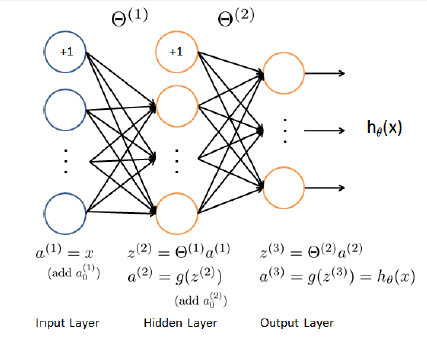


Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset.
It can learn a __non-linear function__ approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. [scikit-learn.org](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

## Regression with Neural Network

- __Regression with linear regression__

In [7]:
import warnings
#warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)

boston_market_data = datasets.load_boston()

boston_train_data, boston_test_data, \
boston_train_target, boston_test_target = \
train_test_split(preprocessing.StandardScaler().fit_transform(boston_market_data['data']),\
                 boston_market_data['target'], test_size=0.1, random_state=1)

print("boston_train_data.shape", boston_train_data.shape)
print("boston_test_data.shape", boston_test_data.shape)

linear_regression = LinearRegression()
linear_regression.fit(boston_train_data, boston_train_target)

print("Mean squared error of a learned linear model: %.2f" % 
      mean_squared_error(boston_test_target, linear_regression.predict(boston_test_data)))

boston_train_data.shape (455, 13)
boston_test_data.shape (51, 13)
Mean squared error of a learned linear model: 20.54


- __Regression with Feed-Forward Neural Network (MLP) using [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)__ 

In [8]:
from sklearn.neural_network import MLPRegressor

neural_network = MLPRegressor(hidden_layer_sizes=(30,20,10,), activation='logistic', solver="sgd", \
                              batch_size=20, shuffle=True, momentum=0.95, alpha=1e-5, verbose=False, \
                              max_iter=500, tol=1e-7, random_state=1)

neural_network.fit(boston_train_data, boston_train_target)

print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(boston_test_target, neural_network.predict(boston_test_data)))

Mean squared error of a learned neural network model: 5.91


__Compare variance score for linear regression and neural network (nonlinear)__

In [9]:
from sklearn.metrics import r2_score
print('Variance score for linear model: %.2f' % r2_score(boston_test_target, linear_regression.predict(boston_test_data)))
print('Variance score for neural network model: %.2f' % r2_score(boston_test_target, neural_network.predict(boston_test_data)))


Variance score for linear model: 0.78
Variance score for neural network model: 0.94


### Visualizing learning process of a neural network

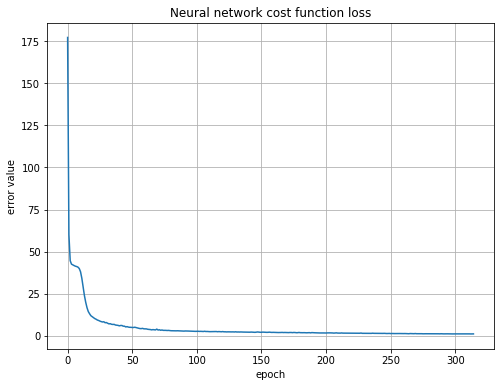

In [10]:
import matplotlib.pyplot as plt
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

TODO: Learn about [MLPRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) class and experiment with different parameters of a neural network and check how they affect the learning process.

In [37]:
import itertools
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

my_neural_network = MLPRegressor(verbose=False, random_state=1)

param_grid = {
    'hidden_layer_sizes': list(itertools.product(
        [22,26,30],
        [18,20],
        [10]
    )),
    'activation': ['logistic'],
    'solver': ["sgd"],
    'batch_size': [20],
    'shuffle': [True],
    'momentum': [0.95],
    'alpha': [1e-5],
    'max_iter': [500],
    'tol': [1e-7]
}

grid_search = GridSearchCV(my_neural_network, param_grid, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(boston_train_data, boston_train_target)

print(pd.DataFrame(grid_search.cv_results_))

print("Mean squared error of a learned neural network model: %.2f" % 
      mean_squared_error(boston_test_target, grid_search.best_estimator_.predict(boston_test_data)))

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       3.700908      0.837704         0.000799         0.00040   
1       3.497434      1.466579         0.000600         0.00049   
2       4.362898      1.240948         0.000800         0.00040   
3       4.180811      0.746451         0.000400         0.00049   
4       3.999323      0.994301         0.000400         0.00049   
5       4.049892      0.423563         0.000600         0.00049   

  param_activation param_alpha param_batch_size param_hidden_layer_sizes  \
0         logistic       1e-05               20             (22, 18, 10)   
1         logistic       1e-05               20             (22, 20, 10)   
2         logistic       1e-05               20             (26, 18, 10)   
3         logistic       1e-05               20             (26, 20, 10)   
4         logistic       1e-05               20             (30, 18, 10)   
5         logistic       1e-05               20             (30, 20, 10)   



__Finding metaparameters for neural network using [GridSearch()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__

In [207]:
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['adam', 'sgd'], 'max_iter': [1000], \
              'hidden_layer_sizes':[(100,), (30,20,10,)], \
              'random_state':np.arange(0,2), 'tol':[1e-7], 'batch_size':[20,60], 'shuffle':[True, False],\
              'momentum':[0.95,0.85], 'activation': ['logistic','relu'], 'alpha':[1e-5,1e-6]}

grid_search = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1, verbose=1, cv=4)
grid_search.fit(boston_train_data, boston_train_target)
        
print(grid_search.score(boston_test_data, boston_test_target))
print(grid_search.best_params_)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 11.7min finished


0.9143066109419051
{'activation': 'relu', 'alpha': 1e-05, 'batch_size': 60, 'hidden_layer_sizes': (30, 20, 10), 'max_iter': 1000, 'momentum': 0.95, 'random_state': 0, 'shuffle': True, 'solver': 'sgd', 'tol': 1e-07}


## Classification with Neural Network

- __Classification with Logistic regression__

max_iter reached after 24 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s finished


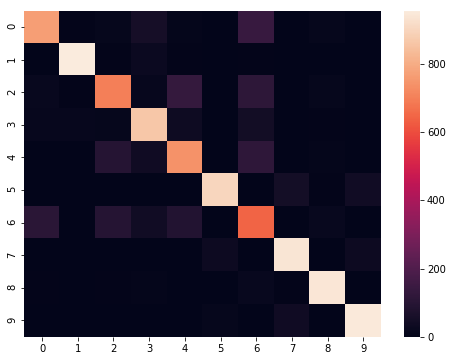

In [208]:
import numpy as np

from sklearn.linear_model import LogisticRegression

from keras.datasets import fashion_mnist
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns;

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


images_train =  []
for image_train in x_train:
    images_train.append(image_train.flatten())

images_test = []

for image_test in x_test:
    images_test.append(image_test.flatten())

images_train = np.array(images_train)
images_test = np.array(images_test)

linear_model = LogisticRegression(verbose=1, max_iter=10, multi_class="multinomial", solver="sag")

linear_model.fit(images_train, y_train)

conf_matrix = confusion_matrix(y_test, linear_model.predict(images_test))

#print("Confusion_matrix:")
#print(conf_matrix)

sns.heatmap(conf_matrix)

In [99]:
acc = accuracy_score(y_test, linear_model.predict(images_test))
print("Linear model accuracy is {0:0.2f}".format(acc))

Linear model accuracy is 0.84


- __Classification with Neural Network (MLP) using [MLPClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)__

Neural network model accuracy is 0.89


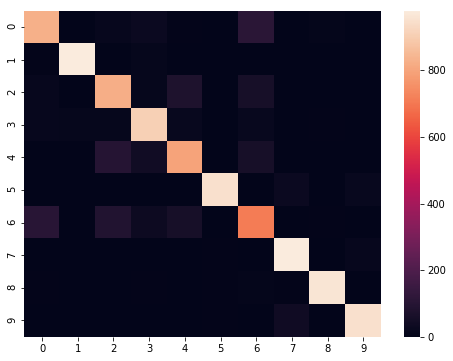

In [100]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(hidden_layer_sizes=(200,100,50),random_state=1)

#neural_network.fit(images_train, y_train)
neural_network.fit(preprocessing.StandardScaler().fit_transform(images_train), y_train)

conf_matrix_neural_network = confusion_matrix(y_test, \
                                              neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))

#print("Confusion_matrix:")
#print(conf_matrix_neural_network)

sns.heatmap(conf_matrix_neural_network)

acc = accuracy_score(y_test, neural_network.predict(preprocessing.StandardScaler().fit_transform(images_test)))
print("Neural network model accuracy is {0:0.2f}".format(acc))

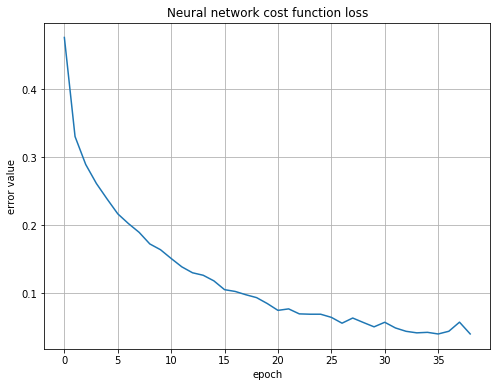

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(neural_network.loss_curve_)
plt.title('Neural network cost function loss')

plt.xlabel('epoch'); plt.ylabel('error value'); plt.grid();

In [102]:
print("Number of connection between input and first hidden layer:")
print(np.size(neural_network.coefs_[0]))

print("Number of connection between first and second hidden layer:")
print(np.size(neural_network.coefs_[1]))

Number of connection between input and first hidden layer:
156800
Number of connection between first and second hidden layer:
20000


- Visualizing weights in neural network

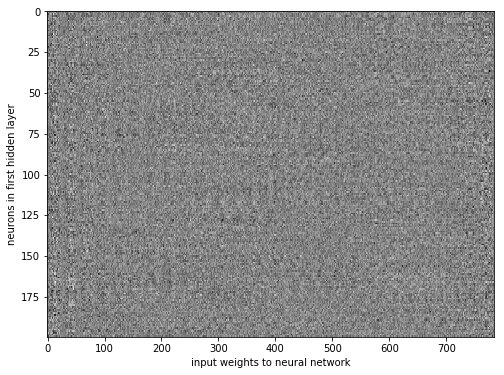

In [103]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.imshow(np.transpose(neural_network.coefs_[0]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.ylabel('neurons in first hidden layer'); plt.xlabel('input weights to neural network');

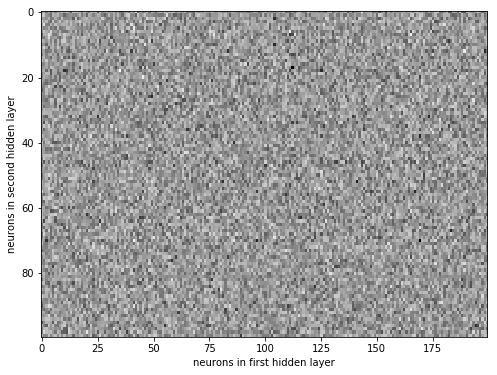

In [104]:
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.imshow(np.transpose(neural_network.coefs_[1]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.ylabel('neurons in second hidden layer'); plt.xlabel('neurons in first hidden layer');

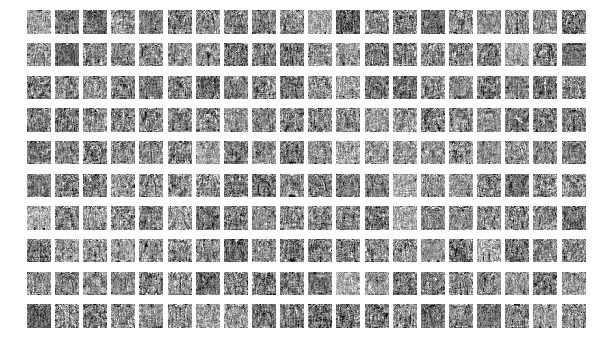

In [105]:
plt.rcParams['figure.figsize'] = [10, 60]
m=200
for i in range(0,m):
    plt.subplot(m/2, 20, i+1)
    plt.axis('off')
    hidden_2 = np.transpose(neural_network.coefs_[0])[i]
    plt.imshow(np.reshape(hidden_2, (28,28)), cmap=plt.get_cmap("gray"),  aspect=1)


### ToDo: 
1. Learn about [MLPClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) class and try find better network architecture (using learning parameters and layers) that will have higher accuracy than 0.89 on training data. (smart way would be to use [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))


2. Train Feed-Forward neural network to recognize hand written digits using Mnist dataset. Visualize learning process and weights connected to the first layer.  

47040000 60000
Iteration 1, loss = 0.98867584
Iteration 2, loss = 0.22989436
Iteration 3, loss = 0.12696565
Iteration 4, loss = 0.08123640
Iteration 5, loss = 0.05070599
Iteration 6, loss = 0.03303293
Iteration 7, loss = 0.02026882
Iteration 8, loss = 0.01360977
Iteration 9, loss = 0.00833123
Iteration 10, loss = 0.00546062
Iteration 11, loss = 0.00347990
Iteration 12, loss = 0.00230304
Iteration 13, loss = 0.00179846
Iteration 14, loss = 0.00147649
Iteration 15, loss = 0.00123278
Iteration 16, loss = 0.00106673
Iteration 17, loss = 0.00092614
Iteration 18, loss = 0.00082089
Iteration 19, loss = 0.00073579
Iteration 20, loss = 0.00066995
Iteration 21, loss = 0.00061186
Iteration 22, loss = 0.00056453
Iteration 23, loss = 0.00051973
Iteration 24, loss = 0.00048485
Iteration 25, loss = 0.00045540
Iteration 26, loss = 0.00042736
Iteration 27, loss = 0.00040318
Iteration 28, loss = 0.00038310
Iteration 29, loss = 0.00036601
Training loss did not improve more than tol=0.000100 for 10 consec

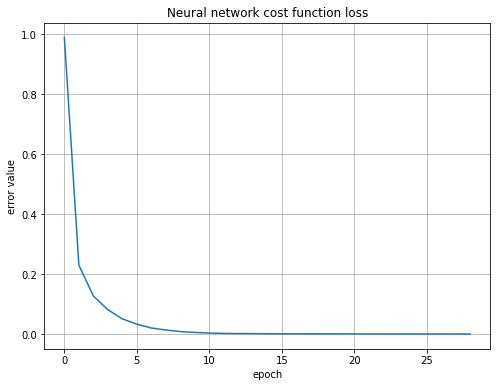

In [5]:
import keras
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.model_selection import GridSearchCV
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from tensorflow.python.client import device_lib 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# preprocess data
x_train =  []
for image_train in X_train:
    x_train.append(image_train.flatten())
x_train = np.array(x_train)
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)

x_test = []
for image_test in X_test:
    x_test.append(image_test.flatten())
x_test = np.array(x_test)
x_test = scaler.transform(x_test)

print(x_train.size, y_train.size)

# train model
# param_grid = {
#     'hidden_layer_sizes': list(itertools.product(
#         [180,190,200],
#         [80,90,100],
#         [30,40,50]
#     )) + list(itertools.product(
#         [170,180,190],
#         [60,70,80],
#         [35,40,45],
#         [10,20,30]
#     ))
# }
# classifier = MLPClassifier(random_state=1, verbose=True)
# grid_search = GridSearchCV(classifier, param_grid, n_jobs=-1, verbose=True)
# grid_search = grid_search.fit(x_train[1:100], y_train[1:100])
# print(pd.DataFrame(grid_search.best_params_))
# best_classifier = grid_search.best_estimator_
# joblib.dump(best_classifier, 'mnist.model') 
# score = accuracy_score(y_test, best_classifier.predict(x_test))a
classifier = MLPClassifier(random_state=1, verbose=True, hidden_layer_sizes=(170,70,45,30))
classifier.fit(x_train[1:10000], y_train[1:10000])

acc = accuracy_score(y_test, classifier.predict(x_test))
print("Neural network model accuracy is {0:0.2f}".format(acc))


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.plot(classifier.loss_curve_)
plt.title('Neural network cost function loss')
plt.xlabel('epoch')
plt.ylabel('error value')
plt.grid()

print("Number of connection between input and first hidden layer:")
print(np.size(classifier.coefs_[0]))


(60000, 28, 28)
(10000, 28, 28)


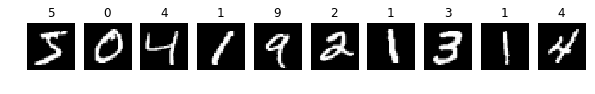

In [107]:
print("Datasets size")
print("Train data:", X_train.shape)
print("Test data:", X_test.shape)

print("Samples from training data:")
for i in range(0,10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap("gray"))
    plt.title(y_train[i]);
    plt.axis('off');

In [46]:
# For fun try using NN for CIFAR-10 classification and test it on real data!

# I don't have such patience